In [82]:
import pandas as pd
import ipaddress
import numpy as np
import pandasql as ps
import matplotlib.pyplot as plt
from sklearn import preprocessing

%matplotlib inline

In [14]:
def pipeline(filename):
    df = pd.read_csv(filename, names = ['ip','date','time','zone','cik','accession','extention','code','size','idx','norefer','noagent','find','crawler','browser'])
    df['ip']= to_ipaddress(df['ip'])
    df['date'] = pd.to_datetime(df['date'])
    df['date'] = [date.date() for date in df['date']]
    return df[['ip', 'date','cik','accession']]

def to_ipaddress(arr): 
    arr = [np.char.replace(ip, ip[-3:],'000') for ip in arr]
    return [int(ipaddress.IPv4Address(x)) for x in arr]

def setupiptable(filename):
    df = pd.read_csv(filename)
    df.iloc[:,0] = df.iloc[:,0].apply(lambda x: int(ipaddress.IPv4Address(x)))
    df.iloc[:,1] = df.iloc[:,1].apply(lambda x: int(ipaddress.IPv4Address(x)))
    df.columns = ["from_ip","to_ip","code","country"]
    return df.drop(['code'],axis=1)

In [15]:
df1 = pipeline('~/Documents/Data/openplustten2003.csv')
df2 = pipeline('~/Documents/Data/openplustten2010.csv')
df3 = pipeline('~/Documents/Data/openplustten2017.csv')
dfgeo = setupiptable('~/Downloads/IP2LOCATION-LITE-DB1.CSV')

In [16]:
sql1code = '''
    SELECT * 
    FROM df1, dfgeo
    WHERE ip BETWEEN from_ip AND to_ip
'''
newdf1 = ps.sqldf(sql1code, locals()).drop(columns=['from_ip','to_ip'])

In [17]:
sql2code = '''
    SELECT * 
    FROM df2, dfgeo
    WHERE ip BETWEEN from_ip AND to_ip
'''
newdf2 = ps.sqldf(sql2code, locals()).drop(columns=['from_ip','to_ip'])

In [18]:
sql3code = '''
    SELECT * 
    FROM df3, dfgeo
    WHERE ip BETWEEN from_ip AND to_ip
'''
newdf3 = ps.sqldf(sql3code, locals()).drop(columns=['from_ip','to_ip'])

In [19]:
newdf1.to_csv('~/Documents/Data/2003df.csv')
newdf2.to_csv('~/Documents/Data/2010df.csv')
newdf3.to_csv('~/Documents/Data/2017df.csv')

In [126]:
covertime = {'year':[2003,2010,2017], 'Number of Countries': [len(newdf1['country'].value_counts()), len(newdf2['country'].value_counts()), len(newdf3['country'].value_counts())]}

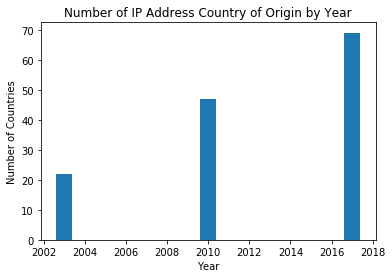

In [134]:
numberofcountries = pd.DataFrame(covertime)
plt.bar(numberofcountries['year'],numberofcountries['Number of Countries'])
plt.title('Number of IP Address Country of Origin by Year')
plt.xlabel('Year')
plt.ylabel('Number of Countries')
fig.savefig('numberofcountries.png')

In [105]:
newdf1['country'].value_counts(normalize=True)

United States of America                                0.900209
United Kingdom of Great Britain and Northern Ireland    0.026646
France                                                  0.009927
Uruguay                                                 0.009404
Canada                                                  0.008359
Israel                                                  0.006270
Germany                                                 0.006270
Belgium                                                 0.005225
India                                                   0.005225
Singapore                                               0.004180
Italy                                                   0.003135
Hong Kong                                               0.003135
Sweden                                                  0.001567
Morocco                                                 0.001567
Greece                                                  0.001567
Netherlands              

In [124]:
len(newdf2)

17600

In [114]:
newdf3['country'].value_counts(normalize=True)

United States of America                                0.692306
China                                                   0.156275
Canada                                                  0.031268
United Kingdom of Great Britain and Northern Ireland    0.030494
Bulgaria                                                0.013628
                                                          ...   
Jamaica                                                 0.000007
Mongolia                                                0.000007
Croatia                                                 0.000007
Iceland                                                 0.000007
Morocco                                                 0.000007
Name: country, Length: 69, dtype: float64

In [123]:
newdf1['count']= newdf1['country'].value_counts(normalize=True)
newdf2['count'] = newdf2['country'].value_counts(normalize=True)
newdf3['count'] = newdf3['country'].value_counts(normalize=True)


sqlcode_limitcountry03 = '''
    select * 
    from newdf1
    order by count desc
    limit 20;'''
sqlcode_limitcountry10 = '''
    select * 
    from newdf2
    order by count desc
    limit 20;'''
sqlcode_limitcountry17 = '''
    select * 
    from newdf3
    order by count desc
    limit 20;'''
countrydf2003 = ps.sqldf(sqlcode_limitcountry03,locals())
countrydf2010 = ps.sqldf(sqlcode_limitcountry10, locals())
countrydf2017 = ps.sqldf(sqlcode_limitcountry17,locals())
countrydf2017

OperationalError: (sqlite3.OperationalError) duplicate column name: count
[SQL: 
CREATE TABLE newdf1 (
	ip BIGINT, 
	date TEXT, 
	cik FLOAT, 
	accession TEXT, 
	country TEXT, 
	"Count" FLOAT, 
	count FLOAT
)

]
(Background on this error at: http://sqlalche.me/e/e3q8)

KeyError: 'Normalized'

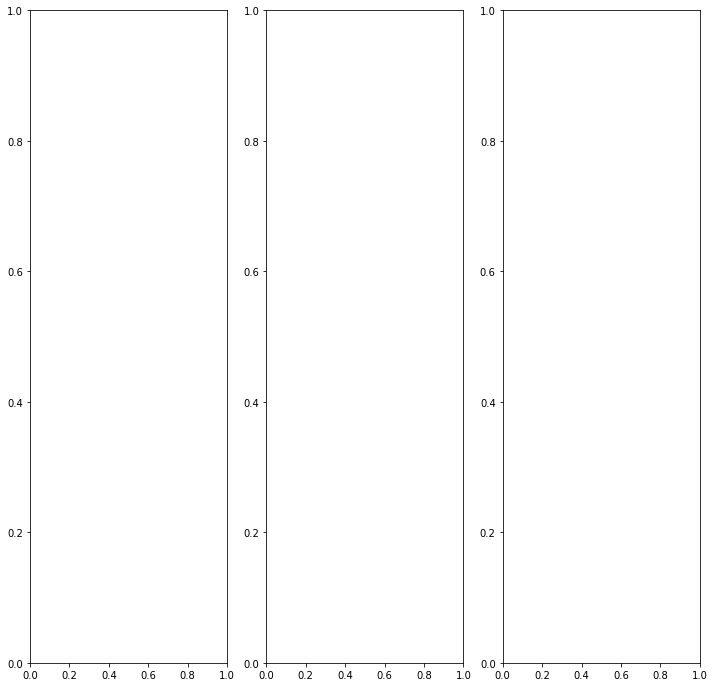

In [121]:
fig, ax = plt.subplots(1,3, figsize=(12,12))


# Subplot 1
countrydf2003['Normalized'].plot.bar()
plt.title("Normalized Count Value for Country Origin of IP Addresses on EDGAR")
plt.xlabel('Country')
plt.ylabel('Normalized Count')

# Subplot 2
countrydf2010['Normalized'].plot.bar()

# Subplot 3
countrydf2017['Normalized'].plot.bar()

fig.savefig('country_counts.png')